### DME_DODECANE_NRTL_PR EOS

Standard deviation of predicted pressures of DME & n-dodecane system at T=323.15 K based on NRTL equation and Peng-Robinson Equation of State from experimental results (J. Chem. Eng. Data 2007, 52, 5, 1814–1818) is 27.655976726183653 kPa


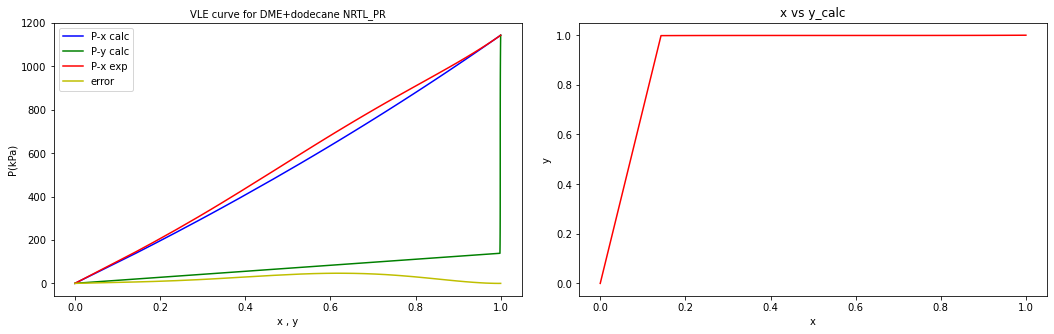

In [8]:
from numpy import log
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
import pandas as pd
import math

T=323.15 #in Kelvin
exp_x1=[0.0,0.1428,0.1843,0.2371,0.2889,0.3191,0.3461,0.3873,0.4666,0.5296,0.5616,0.5900,0.6133,0.6342,0.6559,0.6801,0.7046,0.7290,0.7530,0.7659,0.7950,0.8234,0.8498,0.8744,0.8970,0.9175,0.9357,0.9520,0.9648,0.9758,0.9850,0.9922,0.9959,0.9978,0.9993,1.0000]
x1 = exp_x1
x2 = np.array([])
for i in x1:
    x2 = np.append(x2,1-i)     

#x2 = (1-x1)

R= 8.314
P1sat = 1143390                
P2sat = 200                  


# A12,A21 also are from park2007 paper (J. Chem. Eng. Data 2007, 52, 5, 1814–1818)

A12 = -102.1879     # (g12-g11)
A21 = 40.4763       # (g21-g22)
Alpha12 = 4.9028 

tau12 = A12/(R*T)
tau21 = A21/(R*T)
#print(tau12,tau21)

G12 = exp(-Alpha12*tau12)
G21 = exp(-Alpha12*tau21)
gamma1 = np.array([])
gamma2 = np.array([])

#NRTL equations

for i in x1:
    gamma1 = np.append(gamma1,exp(((1-i)**2)*((tau21*(G21/(i+(1-i)*G21))**2)+(tau12*G12/((1-i)+i*G12)**2))))  
            
    gamma2 =np.append(gamma2,exp(((i)**2)*((tau12*(G12/((1-i)+(i)*G12))**2)+(tau21*G21/((i)+(1-i)*G21)**2))))
data = {'x1data' : x1, 'x2data': x2, 'g1data' : gamma1, 'g2data' : gamma2}       

df = pd.DataFrame(data)  
pd.set_option("display.precision", 6)   

#by using dataframes, we can access multiple values at the same time, it isrepresentation in table form.



#PR equation  #all Tc,Pc,omega for DME-dodecane are taken from google(NIST webbook)

exp1 = np.repeat(1.0,36)
exp2 = np.repeat(1.0,36)
df['exp1']=pd.Series(exp1)
df['exp2']=pd.Series(exp2)

Tc1 = np.repeat(400,36)                                     
Tc2 = np.repeat(658.2,36)
df['Tc1'] = pd.Series(Tc1)
df['Tc2'] = pd.Series(Tc2)

Pc1 = np.repeat(5240000,36)                                     
Pc2 = np.repeat(1800000,36)
df['Pc1'] = pd.Series(Pc1)
df['Pc2'] = pd.Series(Pc2)

om1 = np.repeat(0.2,36)                                     
om2 = np.repeat(0.574,36)
df['omega1'] = pd.Series(om1)
df['omega2'] = pd.Series(om2)

al1 = np.array([])
a1 = np.array([])
b1 = np.array([])

al2 = np.array([])
a2 = np.array([])
b2 = np.array([])

A1sat = np.array([])
A2sat = np.array([])
B1sat = np.array([])
B2sat = np.array([])

for i in df.index:
    al1=np.append(al1,(1+(0.37464+1.54226*df['omega1'][i]-0.26992*df['omega1'][i]**2)*(1-(T/df['Tc1'][i])**0.5))**2)
      
    a1 = np.append(a1,(0.45724*(R*df['Tc1'][i])**2)/(df['Pc1'][i]))                 
                                 
    b1=  np.append(b1,(0.07780*R*df['Tc1'][i])/(df['Pc1'][i]))

    al2=np.append(al2,(1+(0.37464+1.54226*df['omega2'][i]-0.26992*df['omega2'][i]**2)*(1-(T/df['Tc2'][i])**0.5))**2)
      
    a2 = np.append(a2,(0.45724*(R*df['Tc2'][i])**2)/(df['Pc2'][i]))                 
                                 
    b2=  np.append(b2,(0.07780*R*df['Tc2'][i])/(df['Pc2'][i]))

df['alpha1'] = pd.Series(al1)
df['a1'] = pd.Series(a1)
df['b1']=pd.Series(b1)
df['alpha2'] = pd.Series(al2)
df['a2'] = pd.Series(a2)
df['b2']=pd.Series(b2)

for i in df.index:
    A1sat = np.append(A1sat,df['alpha1'][i]*df['a1'][i]*P1sat/(R*T)**2)    
    A2sat = np.append(A2sat,df['alpha2'][i]*df['a2'][i]*P2sat/(R*T)**2)          
for i in df.index:
    B1sat = np.append(B1sat,((df['b1'][i])*P1sat/(R*T)))
    B2sat = np.append(B2sat,((df['b2'][i])*P2sat/(R*T)))

df['A1sat'] = pd.Series(A1sat)
df['B1sat'] = pd.Series(B1sat)
df['A2sat'] = pd.Series(A2sat)
df['B2sat'] = pd.Series(B2sat)
Za1sat = np.array([])
Za2sat = np.array([])

for i in df.index:

    Za1sat =np.append(Za1sat,np.roots([1,-(1-df['B1sat'][i]),(df['A1sat'][i]-2*df['B1sat'][i]-3*(df['B1sat'][i])**2),(-df['A1sat'][i]*df['B1sat'][i]-(df['B1sat'][i]**2)-(df['B1sat'][i]**3))]))
  
    
#we define Z for both components,it is cubic equation and we find roots

for i in df.index:    
    Za2sat = np.append(Za2sat,np.roots([1,-(1-df['B2sat'][i]),(df['A2sat'][i]-2*df['B2sat'][i]-3*(df['B2sat'][i])**2),(-df['A2sat'][i]*df['B2sat'][i]-(df['B2sat'][i]**2)-(df['B2sat'][i]**3))]))
  


Z1sat = np.array([])
for i in Za1sat:
    if i>=0.5:
        Z1sat = np.append(Z1sat,i) 
Z2sat = np.array([])
for i in range(len(Z1sat)):
        Z2sat = np.append(Z2sat,Za2sat.real[3*i])      

df['Z1sat'] = pd.Series(Z1sat)
df['Z2sat'] = pd.Series(Z2sat)

#thus phi can be found, all the correlations are available online for PR equation

phi1_sat = np.array([])
phi2_sat = np.array([])

for i in df.index:
    phi1_sat =np.append(phi1_sat,(exp(df['Z1sat'][i]-1.0-log(df['Z1sat'][i]-df['B1sat'][i])-(df['A1sat'][i]/(2*(2**0.5)*df['B1sat'][i]))*log((df['Z1sat'][i]+(1+(2**0.5))*df['B1sat'][i])/(df['Z1sat'][i]+(1-(2**0.5))*df['B1sat'][i])))))

for i in df.index:
    phi2_sat =np.append(phi2_sat,(exp(df['Z2sat'][i]-1.0-log(df['Z2sat'][i]-df['B2sat'][i])-(df['A2sat'][i]/(2*(2**0.5)*df['B2sat'][i]))*log((df['Z2sat'][i]+(1+(2**0.5))*df['B2sat'][i])/(df['Z2sat'][i]+(1-(2**0.5))*df['B2sat'][i])))))


df['phi1sat'] = pd.Series(phi1_sat)
df['phi2sat'] = pd.Series(phi2_sat)


#initial guess values of phi

phi1_init = np.repeat(1.0,36)
phi2_init = np.repeat(1.0,36)   
df['phi1_init']=pd.Series(phi1_init)
df['phi2_init']=pd.Series(phi2_init)      

P1_init = np.array([])
P2_init = np.array([])

for i in df.index:
    P1_init =np.append(P1_init,((df['x1data'][i])*(df['g1data'][i])*P1sat*df['phi1sat'][i]*df['exp1'][i]/df['phi1_init'][i]))

    P2_init =np.append(P2_init,((df['x2data'][i])*(df['g2data'][i])*P2sat*df['phi2sat'][i]*df['exp2'][i]/df['phi2_init'][i]))

#P1 is written from P-x relations and y1 is also from our equations,these are also added to 'df' dataframe

df['P1data']=pd.Series(P1_init)      
df['P2data']=pd.Series(P2_init)
Pinit = df['P1data']+df['P2data']
df['Pinit'] = pd.Series(Pinit)

#compute y1 from initial P

y1 = np.array([])                          
for i in df.index:
    y1 = np.append(y1,df['P1data'][i]/df['Pinit'][i])          
df['y1data']=pd.Series(y1)

y2 = np.array([])
for i in y1:
    y2 = np.append(y2,1-i)
df['y2data']=pd.Series(y2)

#LOOP STARTS HERE

for j in df.index:
    
    
    while True:

      
        #A and B for PR equation
        A1 = np.array([])
        B1 = np.array([])
        A2 = np.array([])
        B2 = np.array([])

        for i in df.index:
                A1 =np.append(A1,df['alpha1'][i]*df['a1'][i]*df['Pinit'][i]/(R*T)**2)   

                A2 =np.append(A2,df['alpha2'][i]*df['a2'][i]*df['Pinit'][i]/(R*T)**2)   
      
        for i in df.index:
                B1 = np.append(B1,((df['b1'][i])*(df['Pinit'][i])/(R*T)))
                B2 = np.append(B2,((df['b2'][i])*(df['Pinit'][i])/(R*T)))
                

        df['A1'] = pd.Series(A1)
        df['B1'] = pd.Series(B1)
        df['A2'] = pd.Series(A2)
        df['B2'] = pd.Series(B2)
        Za1 = np.array([])
        Za2 = np.array([])


        for i in df.index:

            Za1 =np.append(Za1,np.roots([1,-(1-df['B1'][i]),(df['A1'][i]-2*df['B1'][i]-3*(df['B1'][i])**2),(-df['A1'][i]*df['B1'][i]-(df['B1'][i]**2)-(df['B1'][i]**3))]))
  

        #we define Z for both components,it is cubic equation and we find roots

        for i in df.index:    
            Za2 =np.append(Za2,np.roots([1,-(1-df['B2'][i]),(df['A2'][i]-2*df['B2'][i]-3*(df['B2'][i])**2),(-df['A2'][i]*df['B2'][i]-(df['B2'][i]**2)-(df['B2'][i]**3))]))
  


        Z1 = np.array([])
        for i in Za1:
            if i>=0.5:
                Z1 = np.append(Z1,i) 

        Z2 = np.array([])
        for i in range(len(Z1)):
                Z2 = np.append(Z2,Za2.real[3*i])    

        df['Z1'] = pd.Series(Z1)
        df['Z2'] = pd.Series(Z2)

        #thus phi can be found, all the correlations are available online for PR equation

        phi1_next = np.array([])
        phi2_next = np.array([])

        for i in df.index:
            phi1_next =np.append(phi1_next,(exp(df['Z1'][i]-1.0-log(df['Z1'][i]-df['B1'][i])-(df['A1'][i]/(2*(2**0.5)*df['B1'][i]))*log((df['Z1'][i]+(1+(2**0.5))*df['B1'][i])/(df['Z1'][i]+(1-(2**0.5))*df['B1'][i])))))

        for i in df.index:
            phi2_next =np.append(phi2_next,(exp(df['Z2'][i]-1.0-log(df['Z2'][i]-df['B2'][i])-(df['A2'][i]/(2*(2**0.5)*df['B2'][i]))*log((df['Z2'][i]+(1+(2**0.5))*df['B2'][i])/(df['Z2'][i]+(1-(2**0.5))*df['B2'][i])))))


        df['phi1_next']=pd.Series(phi1_next)
        df['phi2_next']=pd.Series(phi2_next)


        P1_next = np.array([])
        P2_next = np.array([])

        for i in df.index:
            P1_next =np.append(P1_next,((df['x1data'][i])*(df['g1data'][i])*P1sat*df['phi1sat'][i]*df['exp1'][i]/df['phi1_next'][i]))
            P2_next =np.append(P2_next,((df['x2data'][i])*(df['g2data'][i])*P2sat*df['phi2sat'][i]*df['exp2'][i]/df['phi2_next'][i]))

        df['P1next']=pd.Series(P1_next)
        df['P2next']=pd.Series(P2_next)
        Pnext = df['P1next']+df['P2next']
        df['Pnext'] = pd.Series(Pnext)

        y1next = np.array([])                          
        for i in df.index:
            y1next = np.append(y1next,df['P1next'][i]/df['Pnext'][i])          
        df['y1next']=pd.Series(y1next)

        y2next = np.array([])
        for i in y1next:
            y2next = np.append(y2,1-i)
        df['y2next']=pd.Series(y2next)


        deltaP = df['Pnext']-df['Pinit']
        df['deltaP'] = pd.Series(deltaP)

        finalP = np.array([])

        #convergence criteria is approximated as 0.0001

        # All the values(P,phi,y) get updated for each x value

        if df.loc[j,'deltaP']>0.0001:
            df['Pinit'] = df['Pinit'].replace(df['Pinit'][j],df['Pnext'][j])
            #print(df['Pnext'][j])
            #print(df['phi1_next'][j])
            #print(df['phi2_next'][j])
            #print(df['P1next'][j])
            #print(df['y1next'][j])

        else:
            break
#print("Predicted Z1=",Z1," Predicted Z2=",Z2)
#print("Predicted gamma1=",gamma1," Predicted gamma2=",gamma2)
 #loop stops once difference in deltaP = 0.0001 Pa
        
# So,the final values after iteration are given in the table 'df2'. These values can be used to plot graphs

data2 ={'x1':df['x1data'],'phi1_final':df['phi1_next'],'phi2_final':df['phi2_next'],'y1final':df['y1next'],'Pfinal':df['Pnext'],'deltaP_aftritr':df['deltaP']}
df2 = pd.DataFrame(data2)


x=y1next
y=(Pnext/1000)
z=x1
exp_p=[0.20,145.15,189.14,246.81,305.36,340.40,372.26,421.66,518.33,595.76,634.84,669.18,697.09,721.75,747.22,775.24,803.24,830.81,857.44,871.67,903.62,934.56,963.44,990.60,1015.92,1039.51,1061.01,1080.83,1096.75,1110.92,1122.96,1132.65,1137.67,1140.36,1142.39,1143.39]

error = exp_p-(Pnext/1000)

#print(error)

sumsq = 0
for i in range(36):
    sumsq = sumsq + (error[i])**2
    stdev = math.sqrt(sumsq/(len(exp_p)-1))
print("Standard deviation of predicted pressures of DME & n-dodecane system at T=323.15 K based on NRTL equation and Peng-Robinson Equation of State from experimental results (J. Chem. Eng. Data 2007, 52, 5, 1814–1818) is",stdev,"kPa")

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(z,y,'b-')

ax1.plot(x,y,'g-')
ax1.plot(exp_x1,exp_p,'r-')
ax1.plot(z,error,'y-')


ax1.set_title('VLE curve for DME+dodecane NRTL_PR',size = 10)
ax1.set_xlabel('x , y')
ax1.set_ylabel('P(kPa)')
ax1.legend(labels = ('P-x calc','P-y calc','P-x exp','error'),loc = 'upper left')

ax2 = fig.add_subplot(122)
ax2.plot(z,x,'r-')

ax2.set_title('x vs y_calc')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

fig.tight_layout(pad=2.0)
plt.show()








    

    
    
    














